In [36]:
#akyork
#written to analyze the 16 HMO glycans provided by Ben
import sys
import __init__
import json_utility
from glypy.io import glycoct, iupac
import extract_motif 
import customize_motif_vec 
import glycan_io
import pandas as pd
import numpy as np
import plot_glycan_utilities
import seaborn as sns
import motif_class
from importlib import reload
import clustering_analysis_pip
import matplotlib.pyplot as plt
import ndex 
from ndex.networkn import NdexGraph
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
import json_utility
%matplotlib inline

In [37]:
root_addr = '/Users/apple/Desktop/NathanLab/CHO_Anders/lib_cho'
__init__.exact_Ture=True
glycan_dict_addr = root_addr+"glycan_cho_dict.json"

A4FG4S4
M9
A3FG3S3
A4FG4
M6
M5


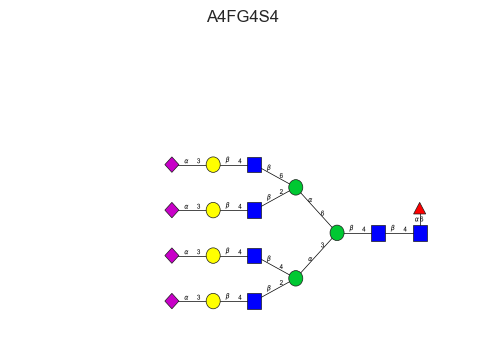

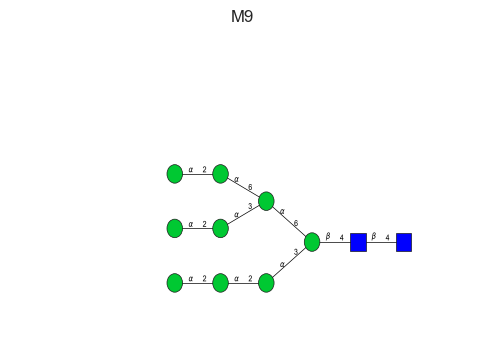

In [73]:
glycan_dict = glycan_io.load_glycan_obj_from_dir('/Users/apple/Desktop/NathanLab/CHO_Anders/GlycanDef/')
name_list = ['A4FG4S4', 'M9']
for i in name_list:
    plot_glycan_utilities.plot_glycan(glycan_dict[i], i)
libDict = {}
libstrDict = {}
for i in name_list:
    libDict[i] = glycan_dict[i]
    libstrDict[i] = str(glycan_dict[i])
json_utility.store_json(glycan_dict_addr, libstrDict)

In [39]:
#run motif search on 16 HMO glycans
#loads the json into dictionary form

#gets motifs and saves to json file
glycan_motif_dict = root_addr+"glycan_motif_dict.json"
choMotif_dict = extract_motif.get_motif_pip(libDict, gly_len=22, output_file=glycan_motif_dict)
# hmoMotif_dict = glycan_io.glycan_str_to_glycan(json_utility.load_json(root_addr+"glycanHMO_motif_dict.json"))        
# glycan_dict_addr = root_addr+"glycan_dict.json"
output_merged_motif_addr = root_addr+"lib_motif_dict.json"


start parallel
closing poll
joining pool
11 1.7911641597747803
18 30.32383394241333
finished pool


In [40]:
master_motif_dict = customize_motif_vec.merge_motif_dict_pipe(choMotif_dict, output_merged_motif_addr, glycan_dict_addr)
motif_vector = glycan_io.motif_dict_to_motif_vec(master_motif_dict)

Start merge_glycan_motif_to_motif_dict
combine original
check merged motif vec len 1364
get_motif_dict_degree_list_pipe
closing poll
joining pool
finished removing duplicate
after the cleaning the motif vec's length is 1312
10 165
11 158
9 157
8 138
12 135
7 113
13 101
6 86
14 65
5 60
4 37
15 35
3 22
1 6
2 13
16 15
17 5
18 1
1 6
2 13
3 22
4 37
5 60
6 86
7 113
8 138
9 157
10 165
11 158
12 135
13 101
14 65
15 35
16 15
17 5
18 1
1312


In [64]:
reload(motif_class)
_motif_lab = motif_class.MotifLabwithCore(motif_vector, glycan_core=motif_class.tri_glycan_core) # unicarbkb_motifs_12259.json
motif_vec = [_motif_lab.motif_vec[i] for i in _motif_lab.motif_with_core_list]


RES
1b:x-dglc-HEX-1:5
2s:n-acetyl
3b:b-dglc-HEX-1:5
4s:n-acetyl
5b:b-dman-HEX-1:5
LIN
1:1d(2+1)2n
2:1o(4+1)3d
3:3d(2+1)4n
4:3o(4+1)5d

start motif_with core
len 4
len 5
len 6
len 7
len 8
len 9
len 10
len 11
len 12
len 13
len 14
len 15
len 16
len 17
len 18
Finish the n-glycan match  613  motifs are matched to the n-glycan core


In [ ]:
{MonosaccharideResidue(Glc2NAc): 6,
 MonosaccharideResidue(Fuc): 1,
 MonosaccharideResidue(Man): 3,
 MonosaccharideResidue(Neu5Ac): 4,
 MonosaccharideResidue(Gal): 4}

In [194]:
import nglycan_composition
reload(nglycan_composition)

<module 'nglycan_composition' from '/Users/apple/PycharmProjects/GlyCompare/src/nglycan_composition.py'>

In [195]:
lib_dict = {}
count = 0
lib_vec = []
for i in motif_vec:
    _glycan_comp = nglycan_composition.nglycan_composition(i)
    if _glycan_comp.possible:
        lib_vec.append(i)
        print(_glycan_comp.mono_composition())
        print(_glycan_comp.composition())
        count+=1
        if _glycan_comp.shorthand() not in lib_dict:
            lib_dict[_glycan_comp.shorthand()] = [i]
        else:
            lib_dict[_glycan_comp.shorthand()].append(i)
count

{'Hex': 2, 'NeuAc': 0, 'dHex': 0, 'HexNAc': 2}
C28H48N2O21
{'Hex': 2, 'NeuAc': 0, 'dHex': 0, 'HexNAc': 2}
C28H48N2O21
{'Hex': 1, 'NeuAc': 0, 'dHex': 1, 'HexNAc': 2}
C28H48N2O20
{'Hex': 3, 'NeuAc': 0, 'dHex': 0, 'HexNAc': 2}
C34H58N2O26
{'Hex': 2, 'NeuAc': 0, 'dHex': 1, 'HexNAc': 2}
C34H58N2O25
{'Hex': 2, 'NeuAc': 0, 'dHex': 1, 'HexNAc': 2}
C34H58N2O25
{'Hex': 4, 'NeuAc': 0, 'dHex': 0, 'HexNAc': 2}
C40H68N2O31
{'Hex': 4, 'NeuAc': 0, 'dHex': 0, 'HexNAc': 2}
C40H68N2O31
{'Hex': 4, 'NeuAc': 0, 'dHex': 0, 'HexNAc': 2}
C40H68N2O31
{'Hex': 3, 'NeuAc': 0, 'dHex': 1, 'HexNAc': 2}
C40H68N2O30
{'Hex': 5, 'NeuAc': 0, 'dHex': 0, 'HexNAc': 2}
C46H78N2O36
{'Hex': 4, 'NeuAc': 0, 'dHex': 0, 'HexNAc': 3}
C48H81N3O36
{'Hex': 6, 'NeuAc': 0, 'dHex': 0, 'HexNAc': 2}
C52H88N2O41
{'Hex': 6, 'NeuAc': 0, 'dHex': 0, 'HexNAc': 2}
C52H88N2O41
{'Hex': 6, 'NeuAc': 0, 'dHex': 0, 'HexNAc': 2}
C52H88N2O41
{'Hex': 4, 'NeuAc': 1, 'dHex': 0, 'HexNAc': 3}
C59H98N4O44
{'Hex': 4, 'NeuAc': 0, 'dHex': 1, 'HexNAc': 3}
C54H91N3O

114

{'Hex': 7, 'NeuAc': 2, 'dHex': 0, 'HexNAc': 6}
C112H184N8O82
A4G4S2
{'S': 2, 'G': 4, 'A': 6, 'g': 0, 'F': 0, 'M': 3}


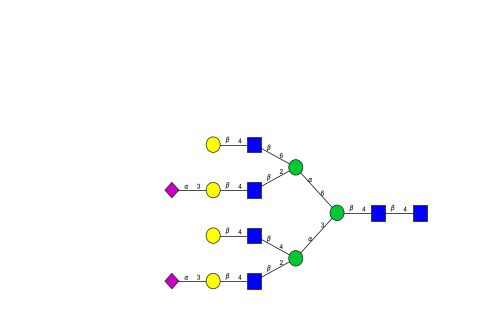

In [196]:
_glycan_comp = nglycan_composition.nglycan_composition(lib_vec[89])
plot_glycan_utilities.plot_glycan(lib_vec[89])
print(_glycan_comp.mono_composition())
print(_glycan_comp.composition())
print(_glycan_comp.shorthand())
print(_glycan_comp.shorthand_dict)


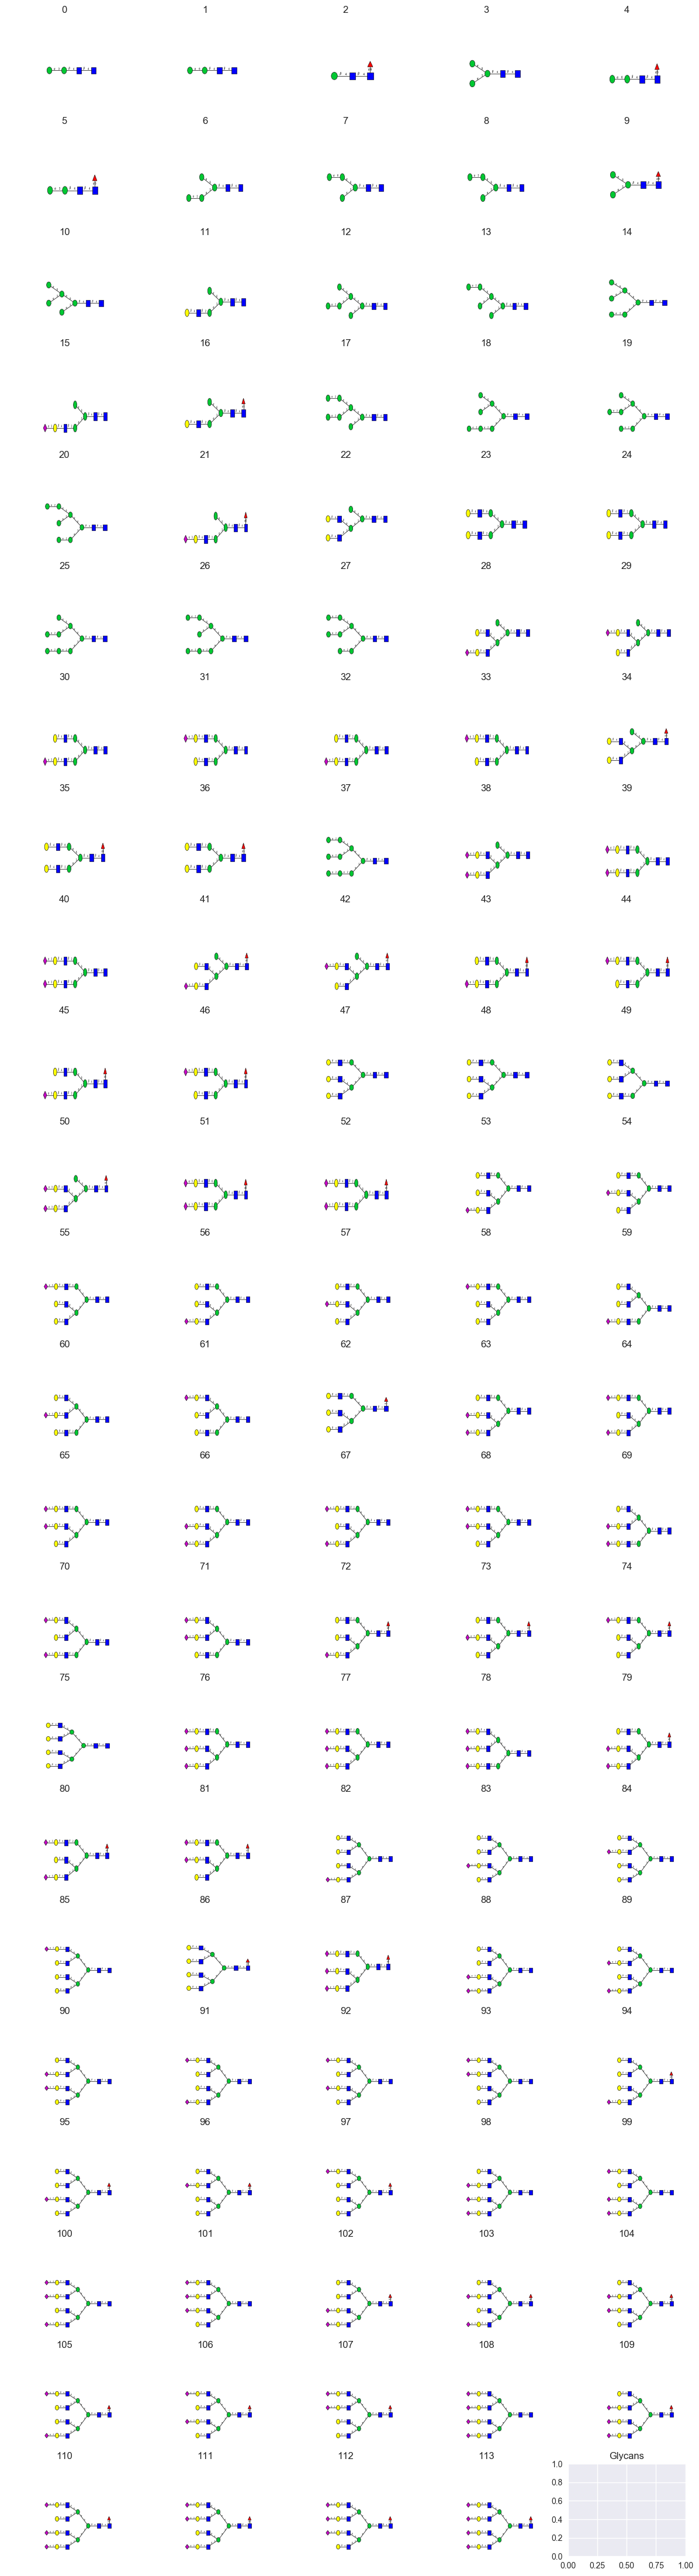

In [197]:
plot_glycan_utilities.plot_glycan_list(lib_vec, range(len(lib_vec)), )

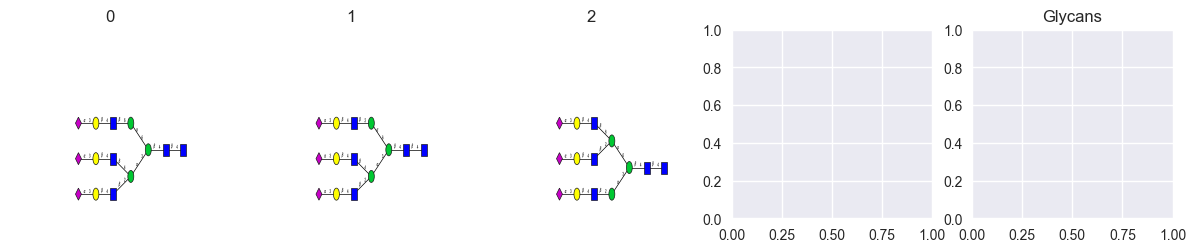

In [193]:
plot_glycan_utilities.plot_glycan_list(lib_vec[84:87])

In [ ]:
lib_dict.keys()

In [140]:
a_glycan

[RES
 1b:x-dglc-HEX-1:5
 2s:n-acetyl
 3b:b-dglc-HEX-1:5
 4s:n-acetyl
 5b:b-dman-HEX-1:5
 6b:a-dman-HEX-1:5
 7b:b-dglc-HEX-1:5
 8s:n-acetyl
 9b:b-dgal-HEX-1:5
 10b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d
 11s:n-acetyl
 12b:b-dglc-HEX-1:5
 13s:n-acetyl
 14b:b-dgal-HEX-1:5
 15b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d
 16s:n-acetyl
 17b:a-dman-HEX-1:5
 18b:b-dglc-HEX-1:5
 19s:n-acetyl
 20b:b-dgal-HEX-1:5
 21b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d
 22s:n-acetyl
 LIN
 1:1d(2+1)2n
 2:1o(4+1)3d
 3:3d(2+1)4n
 4:3o(4+1)5d
 5:5o(3+1)6d
 6:6o(2+1)7d
 7:7d(2+1)8n
 8:7o(4+1)9d
 9:9o(3+2)10d
 10:10d(5+1)11n
 11:6o(4+1)12d
 12:12d(2+1)13n
 13:12o(4+1)14d
 14:14o(3+2)15d
 15:15d(5+1)16n
 16:5o(6+1)17d
 17:17o(6+1)18d
 18:18d(2+1)19n
 19:18o(4+1)20d
 20:20o(3+2)21d
 21:21d(5+1)22n, RES
 1b:x-dglc-HEX-1:5
 2s:n-acetyl
 3b:b-dglc-HEX-1:5
 4s:n-acetyl
 5b:b-dman-HEX-1:5
 6b:a-dman-HEX-1:5
 7b:b-dglc-HEX-1:5
 8s:n-acetyl
 9b:b-dgal-HEX-1:5
 10b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d
 11s:n-acetyl
 12b:b-dglc-HEX-1:5
 13s:n-

In [144]:
a_glycan[0].total_composition()

PComposition(int, {'C': 109, 'H': 178, 'N': 8, 'O': 80})

In [ ]:
glycan.

In [3]:
+2106.25 +5700+5000-23548


-10741.75

[RES
 1b:x-dglc-HEX-1:5
 2s:n-acetyl
 3b:b-dglc-HEX-1:5
 4s:n-acetyl
 5b:b-dman-HEX-1:5
 6b:a-dman-HEX-1:5
 7b:b-dglc-HEX-1:5
 8s:n-acetyl
 9b:b-dgal-HEX-1:5
 10b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d
 11s:n-acetyl
 12b:b-dglc-HEX-1:5
 13s:n-acetyl
 14b:b-dgal-HEX-1:5
 15b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d
 16s:n-acetyl
 17b:a-dman-HEX-1:5
 18b:b-dglc-HEX-1:5
 19s:n-acetyl
 20b:b-dgal-HEX-1:5
 21b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d
 22s:n-acetyl
 LIN
 1:1d(2+1)2n
 2:1o(4+1)3d
 3:3d(2+1)4n
 4:3o(4+1)5d
 5:5o(3+1)6d
 6:6o(2+1)7d
 7:7d(2+1)8n
 8:7o(4+1)9d
 9:9o(3+2)10d
 10:10d(5+1)11n
 11:6o(4+1)12d
 12:12d(2+1)13n
 13:12o(4+1)14d
 14:14o(3+2)15d
 15:15d(5+1)16n
 16:5o(6+1)17d
 17:17o(6+1)18d
 18:18d(2+1)19n
 19:18o(4+1)20d
 20:20o(3+2)21d
 21:21d(5+1)22n, RES
 1b:x-dglc-HEX-1:5
 2s:n-acetyl
 3b:b-dglc-HEX-1:5
 4s:n-acetyl
 5b:b-dman-HEX-1:5
 6b:a-dman-HEX-1:5
 7b:b-dglc-HEX-1:5
 8s:n-acetyl
 9b:b-dgal-HEX-1:5
 10b:a-dgro-dgal-NON-2:6|1:a|2:keto|3:d
 11s:n-acetyl
 12b:b-dglc-HEX-1:5
 13s:n-